<a href="https://colab.research.google.com/github/SauryanPandey/TSNE-LogDet/blob/main/tsne_logdet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True

In [ ]:
!pip install -i https://test.pypi.org/simple/ --extra-index-url https://pypi.org/simple/ submodlib

Looking in indexes: https://test.pypi.org/simple/, https://pypi.org/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 3.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for submodlib: filename=submodlib-1.1.5-cp310-cp310-linux_x86_64.whl size=524955 sha256=13652a540a61175b9fa8a3d233d54b91532e04074ce33f13ea3e8cf26999b9ce
  Stored in directory: /root/.cache/pip/wheels/2b/2d/27/431280879b1de9b3743c26b631a0df1a1be90c30f4d5b5e570
  Created wheel for sklearn: filename=sklearn-0.0.post5-py3-none-any.whl size=2359 sha256=11bdc5f04cf84a2b5bbee91e0eabd2a3d4d65757016f306ab22260a247064de5
  Stored in directory: /root/.cache/pip/wheels/38/1f/8d/4f812c590e074c1e928f5cec67bf5053b71f38e2648739403a
Successfully built submodlib sklearn


In [ ]:
import torch
from torch import nn
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

In [ ]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cuda device


In [ ]:
image_path = "/kaggle/input/breast-mnist/train_images (BreastMNIST).npy"
label_path = "/kaggle/input/breast-mnist/train_labels (BreastMNIST).npy"
y = np.load(label_path)
y = torch.from_numpy(y).to(device)
print(y.shape)

torch.Size([647])


In [ ]:
x = np.load(image_path)
x = np.transpose(x, (0, 3, 1, 2))  # Transpose image dimensions to match ResNet input
x = torch.from_numpy(x).to(device)
print(x.shape)

torch.Size([647, 3, 224, 224])


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# Create train and test datasets
train_dataset = TensorDataset(x_train, y_train)
test_dataset = TensorDataset(x_test, y_test)

# Create train and test data loaders
batch_size = 8
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
for data in train_loader:
    print(data)
    break

[tensor([[[[0.3350, 0.1938, 0.1328,  ..., 0.8578, 0.8485, 0.0294],
          [0.7080, 0.3588, 0.5279,  ..., 0.8037, 0.7923, 0.2762],
          [0.2741, 0.7867, 0.6034,  ..., 0.6901, 0.7415, 0.7813],
          ...,
          [0.0902, 0.0861, 0.1045,  ..., 0.1038, 0.0995, 0.0676],
          [0.1158, 0.1116, 0.0919,  ..., 0.0956, 0.0909, 0.0950],
          [0.0976, 0.1067, 0.1010,  ..., 0.0853, 0.1011, 0.1138]],

         [[0.3350, 0.1938, 0.1328,  ..., 0.8578, 0.8485, 0.0294],
          [0.7080, 0.3588, 0.5279,  ..., 0.8037, 0.7923, 0.2762],
          [0.2741, 0.7867, 0.6034,  ..., 0.6901, 0.7415, 0.7813],
          ...,
          [0.0902, 0.0861, 0.1045,  ..., 0.1038, 0.0995, 0.0676],
          [0.1158, 0.1116, 0.0919,  ..., 0.0956, 0.0909, 0.0950],
          [0.0976, 0.1067, 0.1010,  ..., 0.0853, 0.1011, 0.1138]],

         [[0.3350, 0.1938, 0.1328,  ..., 0.8578, 0.8485, 0.0294],
          [0.7080, 0.3588, 0.5279,  ..., 0.8037, 0.7923, 0.2762],
          [0.2741, 0.7867, 0.6034,  ..., 

In [ ]:
# Load the pre-trained ResNet18 model
resnet = models.resnet18(pretrained=True)
resnet = resnet.to(device)
resnet.eval()  # Set the model to evaluation model

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 191MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
# Function to extract features from input images using ResNet18
def extract_features(images):
    features = []
    for batch in images:
        with torch.no_grad():
            batch = batch[0].to(device)
            features_batch = resnet(batch)
            features_batch = features_batch.view(features_batch.size(0), -1)
            features.append(features_batch)

    features = torch.cat(features, dim=0)
    return features

In [ ]:
# Extract features from x_train
x_train_features = extract_features(train_loader)
print(x_train_features.shape)

torch.Size([517, 1000])


In [ ]:
from submodlib import LogDeterminantFunction
from scipy.spatial.distance import pdist, squareform

# Compute the pairwise similarity matrix using negative Euclidean distance
similarity_matrix = squareform(pdist(x_train_features.numpy(), metric='euclidean'))
similarity_matrix = -torch.tensor(similarity_matrix)

# Create an instance of the LogDeterminantFunction class
n = x_train_features.shape[0]
mode = "dense"
lambda_val = 1.0
log_det_function = LogDeterminantFunction(n, mode, lambda_val, data=similarity_matrix)

# Specify the number of desired diverse features
num_desired_features = 100

# Initialize an empty set to store selected feature indices
selected_features = set()

# Greedy algorithm to select the most diverse features
while len(selected_features) < num_desired_features:
    best_gain = float('-inf')
    best_feature = None
    for feature in range(x_train_features.shape[0]):
        if feature not in selected_features:
            current_features = selected_features.copy()
            current_features.add(feature)
            gain = log_det_function.evaluate(current_features) - log_det_function.evaluate(selected_features)
            if gain > best_gain:
                best_gain = gain
                best_feature = feature
    selected_features.add(best_feature)

# Convert the selected feature indices to a list
selected_features = list(selected_features)

# Print the selected feature indices
print(selected_features)

[512, 1, 2, 515, 516, 5, 3, 6, 4, 14, 17, 18, 19, 20, 23, 27, 36, 42, 43, 44, 47, 49, 54, 57, 59, 71, 76, 84, 103, 116, 118, 119, 120, 121, 135, 136, 138, 146, 151, 154, 160, 165, 171, 182, 194, 200, 208, 212, 219, 220, 221, 233, 234, 247, 253, 254, 263, 265, 268, 270, 273, 276, 285, 287, 312, 321, 326, 327, 332, 337, 340, 348, 349, 352, 354, 363, 369, 383, 386, 389, 394, 401, 407, 409, 413, 420, 430, 431, 434, 443, 447, 458, 468, 480, 493, 501, 504, 506, 508, 510]


(517, 2)


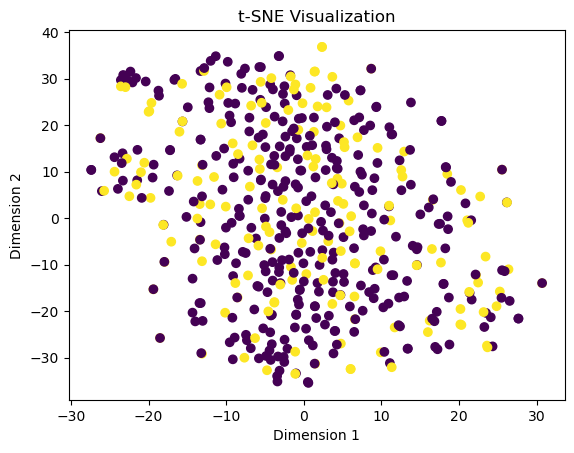

In [ ]:
# Example usage of t-SNE on the extracted features
tsne = TSNE(n_components=2, random_state=2, n_iter=5000)
x_train_tsne = tsne.fit_transform(x_train_features.cpu().numpy())
print(x_train_tsne.shape)
# Visualize t-SNE embeddings
plt.scatter(x_train_tsne[:, 0], x_train_tsne[:, 1], c=y_train.cpu().numpy())
plt.title("t-SNE Visualization")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

In [ ]:
# Convert the tsne transformed features to a PyTorch tensor
x_train_tsne_tensor = torch.tensor(x_train_tsne)

# Compute the pairwise similarity matrix using negative Euclidean distance
similarity_matrix = squareform(pdist(x_train_tsne_tensor.numpy(), metric='euclidean'))
similarity_matrix = -torch.tensor(similarity_matrix)

# Create an instance of the LogDeterminantFunction class
n = x_train_tsne_tensor.shape[0]
mode = "dense"
lambda_val = 1.0
log_det_function = LogDeterminantFunction(n, mode, lambda_val, data=similarity_matrix)

# Specify the number of desired diverse features
num_desired_features = 100

# Initialize an empty set to store selected feature indices
tsne_selected_features = set()

# Greedy algorithm to select the most diverse features
while len(tsne_selected_features) < num_desired_features:
    best_gain = float('-inf')
    best_feature = None
    for feature in range(x_train_tsne_tensor.shape[0]):
        if feature not in tsne_selected_features:
            current_features = tsne_selected_features.copy()
            current_features.add(feature)
            gain = log_det_function.evaluate(current_features) - log_det_function.evaluate(tsne_selected_features)
            if gain > best_gain:
                best_gain = gain
                best_feature = feature
    tsne_selected_features.add(best_feature)

# Convert the selected feature indices to a list
tsne_selected_features = list(tsne_selected_features)

# Print the selected feature indices
print(tsne_selected_features)

[1, 2, 515, 516, 6, 8, 10, 32, 33, 35, 46, 49, 53, 57, 63, 67, 71, 82, 83, 88, 92, 94, 95, 96, 99, 103, 109, 110, 121, 122, 138, 139, 146, 152, 156, 167, 171, 185, 192, 200, 202, 207, 212, 219, 221, 247, 248, 250, 251, 264, 265, 267, 270, 273, 286, 289, 290, 292, 298, 300, 308, 311, 316, 324, 326, 327, 332, 337, 342, 345, 348, 370, 372, 375, 383, 384, 392, 395, 401, 418, 423, 428, 430, 434, 443, 453, 456, 458, 462, 468, 469, 478, 480, 483, 487, 495, 499, 506, 508, 510]


In [ ]:
selected_features = [512, 1, 2, 515, 516, 5, 3, 6, 4, 14, 17, 18, 19, 20, 23, 27, 36, 42, 43, 44, 47, 49, 54, 57, 59, 71, 76, 84, 103, 116, 118, 119, 120, 121, 135, 136, 138, 146, 151, 154, 160, 165, 171, 182, 194, 200, 208, 212, 219, 220, 221, 233, 234, 247, 253, 254, 263, 265, 268, 270, 273, 276, 285, 287, 312, 321, 326, 327, 332, 337, 340, 348, 349, 352, 354, 363, 369, 383, 386, 389, 394, 401, 407, 409, 413, 420, 430, 431, 434, 443, 447, 458, 468, 480, 493, 501, 504, 506, 508, 510]

In [ ]:
logdet_x_train = []
logdet_y_train = []

for i in range(len(x_train)):
    if i in selected_features:
        logdet_x_train.append(x_train[i])
        logdet_y_train.append(y_train[i])
logdet_x_train = torch.stack(logdet_x_train)
logdet_y_train = torch.tensor(logdet_y_train)
print(logdet_x_train.shape)

torch.Size([100, 3, 224, 224])


In [ ]:
tsne_selected_features = [1, 2, 515, 516, 6, 8, 10, 32, 33, 35, 46, 49, 53, 57, 63, 67, 71, 82, 83, 88, 92, 94, 95, 96, 99, 103, 109, 110, 121, 122, 138, 139, 146, 152, 156, 167, 171, 185, 192, 200, 202, 207, 212, 219, 221, 247, 248, 250, 251, 264, 265, 267, 270, 273, 286, 289, 290, 292, 298, 300, 308, 311, 316, 324, 326, 327, 332, 337, 342, 345, 348, 370, 372, 375, 383, 384, 392, 395, 401, 418, 423, 428, 430, 434, 443, 453, 456, 458, 462, 468, 469, 478, 480, 483, 487, 495, 499, 506, 508, 510]

In [ ]:
tsne_x_train = []
tsne_y_train = []

for i in range(len(x_train)):
    if i in tsne_selected_features:
        tsne_x_train.append(x_train[i])
        tsne_y_train.append(y_train[i])
tsne_x_train = torch.stack(tsne_x_train)
tsne_y_train = torch.tensor(tsne_y_train)
print(tsne_x_train.shape)

torch.Size([100, 3, 224, 224])


In [ ]:
# Create train dataset
logdet_train_dataset = TensorDataset(logdet_x_train, logdet_y_train)
tsne_train_dataset = TensorDataset(tsne_x_train, tsne_y_train)

# Create train dataloader
batch_size = 8
logdet_train_loader = DataLoader(logdet_train_dataset, batch_size=batch_size, shuffle=True)
tsne_train_loader = DataLoader(tsne_train_dataset, batch_size=batch_size, shuffle=True)

In [ ]:
# Load the ResNet model
resnet = models.resnet18(pretrained=True)

# Freeze the parameters of the ResNet model
for param in resnet.parameters():
    param.requires_grad = False

# Get the number of output features from the ResNet model
num_input_features = resnet.fc.out_features
print(num_input_features)

1000


In [ ]:
class PyTorchClassifier(nn.Module):
    def __init__(self, resnet_model, num_input_features):
        super().__init__()
        self.resnet_model = resnet_model.to(device)
        self.classifier = nn.Sequential(
            nn.Linear(num_input_features, 256),
            nn.ReLU(inplace=True),
            nn.Linear(256, 128),
            nn.ReLU(inplace=True),
            nn.Linear(128, 2)
        ).to(device)

    def forward(self, x):
        features = self.resnet_model(x)
        features = features.view(features.size(0), -1)
        output = self.classifier(features).to(device)
        return output

In [ ]:
# Instantiate the PyTorchClassifier
pytorch_classifier = PyTorchClassifier(resnet, num_input_features)

# Define the loss function
loss_fn = nn.CrossEntropyLoss()

# Define the optimizer
optimizer = torch.optim.Adam(pytorch_classifier.parameters(), lr=0.001, weight_decay=0.1)

num_epochs = 400

def train(dataloader):
    pytorch_classifier.train()
    for epoch in range(num_epochs):
        for inputs, labels in dataloader:

            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = pytorch_classifier(inputs)
            loss = loss_fn(outputs, labels)
            loss.backward()
            optimizer.step()

In [ ]:
train(logdet_train_loader)

# Evaluation
pytorch_classifier.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for inputs, labels in test_loader:
        outputs = pytorch_classifier(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Test Accuracy: {accuracy}%")

Test Accuracy: 72.3076923076923%


In [ ]:
train(tsne_train_loader)

# Evaluation
pytorch_classifier.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for inputs, labels in test_loader:
        outputs = pytorch_classifier(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Test Accuracy: {accuracy}%")

Test Accuracy: 75.38461538461539%
